> 📌 **Nota de autoría:**  
> Este notebook está basado en el material provisto por el profesor **Matías Barreto**  
> para la materia **Técnicas de Procesamiento de Imágenes** (IFTS N.º 24 – 2025).  
> El contenido fue complementado con explicaciones teóricas, comentarios y recursos adicionales  
> por Cynthia Villagra, con asistencia de herramientas como **ChatGPT** y bibliografía de libre acceso. 

# Muestreo y Cuantización en Procesamiento de Imágenes

El procesamiento digital de imágenes se basa en dos operaciones fundamentales:

* Muestreo espacial: Convertir una imagen continua en una matriz discreta de píxeles

* Cuantización: Asignar valores discretos a la intensidad de cada píxel

In [1]:
# Preparación del entorno

import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

Estas bibliotecas son fundamentales:

* NumPy: Permite trabajar con matrices (que es como se representan las imágenes)
* OpenCV (cv2): Biblioteca especializada en procesamiento de imágenes
* Matplotlib: Nos permite visualizar las imágenes y gráficos

In [2]:
# Descargamos las imágenes de ejemplo
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/253027.jpg
!wget https://sipi.usc.edu/database/preview/misc/gray21.512.png
!wget https://www.dropbox.com/s/vjxcddg5rgap35i/scale.png

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Visualización y análisis de la imagen original

In [3]:
# Muestra información básica de la imagen
def howis(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto (más blanco)
    print('Mínimo =', np.min(img))   # Valor más bajo (más negro)

In [4]:
# 3. CARGA Y VISUALIZACIÓN DE IMAGEN ORIGINAL
X = imread('253027.jpg')    # Lee la imagen del archivo
X = X[:,:,0]               # Toma solo el primer canal (rojo)
                          # Los : significan "todos los elementos"

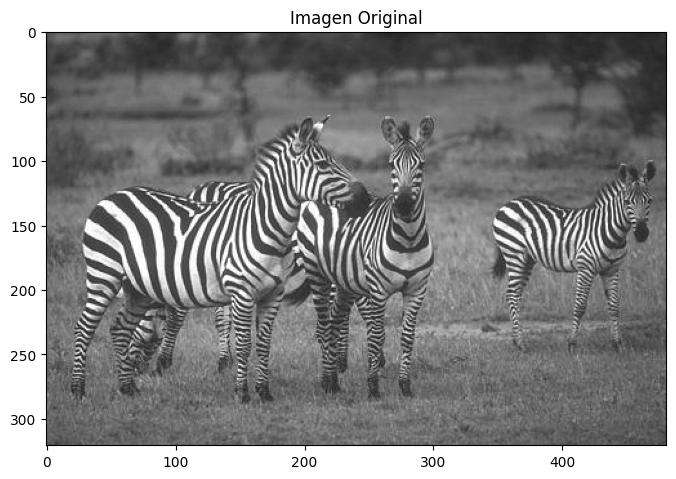

Tamaño = (321, 481)
Máximo = 255
Mínimo = 6


In [5]:
# Muestra la imagen original
plt.figure(figsize=(8,8))   # Crea figura de 8x8 pulgadas
plt.imshow(X, cmap='gray')  # Muestra imagen en escala de grises
plt.title('Imagen Original')
plt.show()                  # Muestra la figura
howis(X)                    # Muestra información

## Muestreo Espacial

El muestreo espacial reduce la resolución de una imagen tomando píxeles a intervalos regulares.

### 🧠 ¿Qué es el **muestreo espacial**?

El **muestreo espacial** es una técnica utilizada en el procesamiento de imágenes que **reduce la resolución** de una imagen **tomando solo algunos píxeles** en lugar de todos. Es decir, se hace una "selección" de píxeles según un patrón.

---

## 📷 Imaginá esto con un ejemplo:

Tenés una imagen de **100 x 100 píxeles**. Eso significa que hay 10.000 puntos con información de color.

Si hacés un muestreo espacial con un **paso de 2**, vas a tomar **un píxel de cada dos**, en ambas direcciones (horizontal y vertical). Entonces la imagen final será de **50 x 50 píxeles**.

👉 Te estás "saltando" píxeles, lo que genera una imagen más chica (menos detallada).

---

## 🧱 Analógicamente:

Es como mirar una pared de ladrillos, pero en lugar de mirar **cada ladrillo**, solo observás **uno de cada dos** en cada fila y columna.

---

## 🔍 ¿Cómo se hace en código?

En NumPy (como usás en Python con imágenes), se puede hacer algo así:

```python
# Imagen original: imagen_rgb
imagen_muestreada = imagen_rgb[::2, ::2]  # Toma un píxel cada 2 en filas y columnas
```

### 🔢 ¿Qué significa `::2`?

- `imagen_rgb[::2, ::2]` significa:  
  - Tomar cada **segunda fila** (`::2` en eje vertical)
  - Tomar cada **segunda columna** (`::2` en eje horizontal)

---

## 🎯 ¿Para qué sirve?

1. 🔽 **Reducir resolución** para ahorrar memoria o procesamiento.
2. ⚙️ Como paso previo en algoritmos que no necesitan tantos detalles.
3. 🧪 En visualizaciones rápidas o efectos artísticos.

---

## 👀 ¿Qué efecto tiene visualmente?

- Se ve **más pixelada**.
- Se pierden **detalles finos** (texturas, bordes suaves).
- Puede parecer una imagen de “baja calidad”.

---

## ✅ En resumen:

| Concepto                  | Explicación simple                                  |
|--------------------------|-----------------------------------------------------|
| Muestreo espacial         | Tomar menos píxeles de la imagen original.         |
| Resultado                 | Imagen más pequeña, con menos detalles.            |
| Cómo se aplica            | Saltando píxeles en forma regular (por ejemplo, de a 2). |
| Aplicaciones              | Reducción de resolución, compresión, eficiencia.   |


In [6]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d --FILAS--
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [7]:
# Crea nueva imagen muestreada
Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny):              # Para cada fila
    for j in range(My):          # Para cada columna
        Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

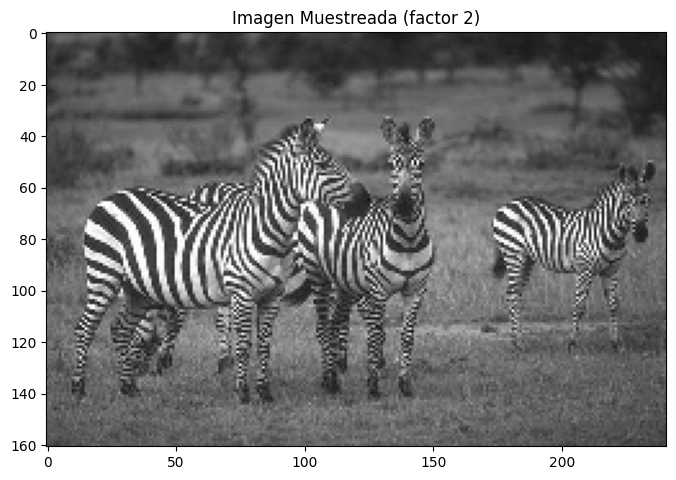

Tamaño = (161, 241)
Máximo = 255
Mínimo = 20
Resolución reducida de 321x481 a 161x241 pixels


In [8]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

## Cuantizacion

La cuantización reduce el número de niveles de gris en la imagen.

### 🎚 ¿Qué es la **cuantización**?

La **cuantización** es un proceso que **reduce la cantidad de valores posibles** que puede tener cada píxel en una imagen.

En una imagen en escala de grises, cada píxel suele tener un valor entre **0 y 255**, lo que representa **256 niveles de gris** (8 bits por píxel).

La cuantización consiste en **reducir ese rango**, por ejemplo, de 256 niveles a solo 4, 8, 16 o 32 niveles de gris.

---

## 🧱 Analógicamente:

Es como si tuvieras una paleta de 256 colores para pintar, pero decidís usar solo 4 tonos de gris. Es más rápido, más barato, pero perdés detalles finos.

---

## 📷 Ejemplo práctico

Imaginemos un píxel con valor 190.

Si lo cuantizás a 4 niveles, esos niveles podrían ser:

- 0
- 85
- 170
- 255

Entonces, el valor 190 se reemplaza por el más cercano: **170** o **255**, dependiendo del criterio.

---

## 🔢 ¿Cómo se hace esto en código?

En NumPy (Python), podés hacer:

```python
niveles = 4  # Queremos 4 niveles de gris
factor = 256 // niveles
imagen_cuantizada = (imagen_gris // factor) * factor
```

### ¿Qué hace esta fórmula?

1. `imagen_gris // factor`: divide cada valor de gris por el tamaño de cada intervalo.
2. `* factor`: vuelve a escalar los valores para que estén centrados en el nivel correspondiente.

📌 Por ejemplo:
- Si `factor = 64`, los valores posibles serán: 0, 64, 128, 192.

---

## 🎯 ¿Para qué sirve la cuantización?

1. 🧳 **Reducir el tamaño de almacenamiento** (menos bits por píxel).
2. ⚙️ **Preparar imágenes para algoritmos de compresión**.
3. 🧪 Para estudiar cómo afecta la calidad visual la reducción de información.
4. 🖼 Aplicaciones artísticas o de estilo “posterizado”.

---

## 👀 ¿Qué efecto tiene visualmente?

- La imagen se vuelve **más "escalonada"**.
- Se pierden **transiciones suaves** entre tonos.
- Pueden aparecer **bandas de color** (efecto “banding”).

---

## ✅ En resumen

| Concepto         | Explicación                                         |
|------------------|-----------------------------------------------------|
| Cuantización     | Reducir la cantidad de tonos o colores disponibles |
| Aplicación       | Imágenes más livianas, menos detalle visual        |
| Efecto visual    | Imagen con menos suavidad, más cortes o bandas     |
| Ejemplo típico   | De 256 niveles de gris a 4, 8, 16 o 32 niveles     |

---

¿Querés que lo armemos en un notebook con imágenes reales para que veas cómo se ve una imagen cuantizada?

In [9]:
q = 32  # Factor de cuantización: define cuántos niveles de gris vamos a tener.
        # Si q=32, tendremos 256 / 32 = 8 niveles posibles: 0, 32, 64, ..., 224

# La siguiente línea aplica la fórmula de cuantización uniforme:
# Divide cada valor de píxel por q, lo que lo agrupa dentro de un intervalo (bin).
# Luego usa floor() para redondear hacia abajo al inicio del intervalo.
# Finalmente multiplica por q para volver al rango de valores original, pero reducido.
Z = np.floor(X/q)*q  # Ejemplo: si un píxel vale 90 y q=32 → 90/32 = 2.81 → floor = 2 → 2*32 = 64

# Convierte los valores cuantizados al tipo de dato uint8 (enteros de 0 a 255),
# que es el formato estándar para imágenes en escala de grises.
Z = Z.astype(np.uint8)


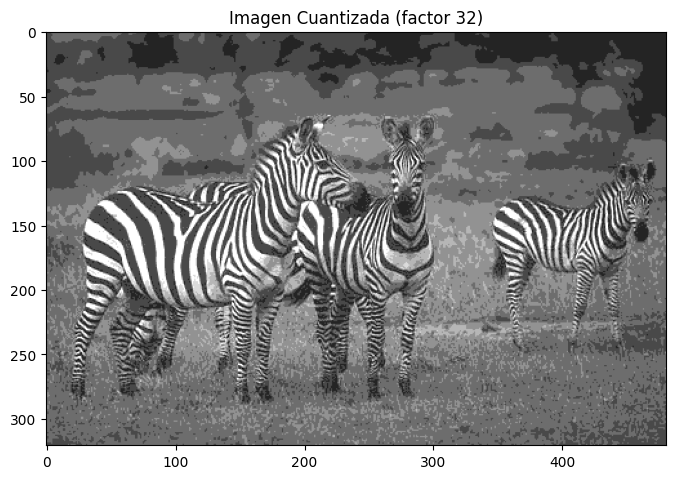

Tamaño = (321, 481)
Máximo = 224
Mínimo = 0
Esta imagen tiene 8 niveles de gris (original: 256)


In [10]:
# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Z)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

## Histograma de la imagen

El histograma muestra la distribución de los niveles de gris en la imagen.

In [11]:
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

VISUALIZACIÓN DE HISTOGRAMAS

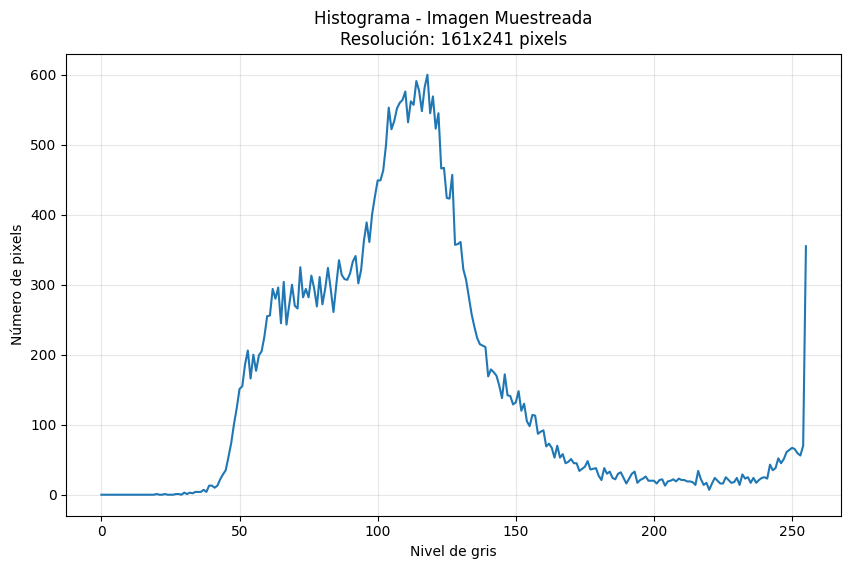

In [12]:
# Histograma imagen muestreada
plt.figure(figsize=(10,6))
plt.plot(hist(Y))
plt.title(f'Histograma - Imagen Muestreada\nResolución: {Ny}x{My} pixels')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

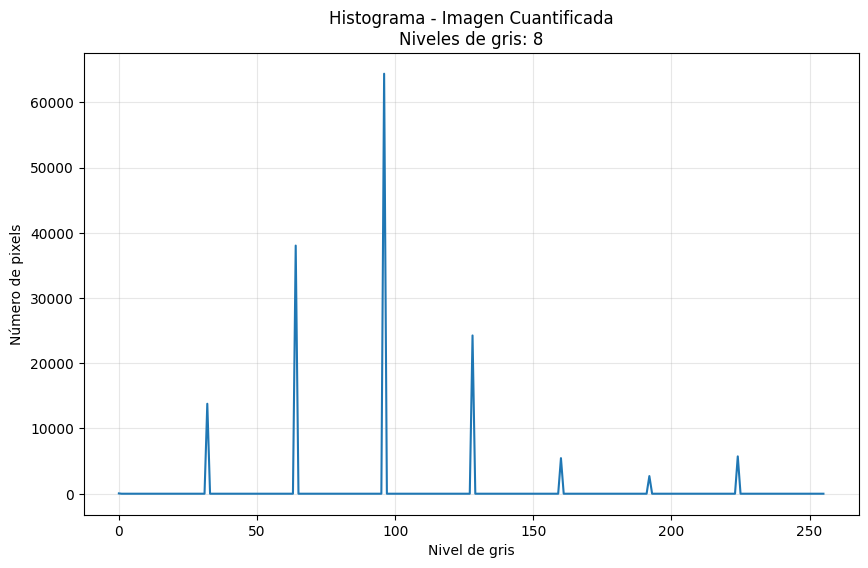

In [13]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Z))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

### Conceptos clave para reforzar

* Resolución espacial: Número de píxeles en la imagen (afectado por el muestreo)
* Profundidad de bits: Número de niveles de gris posibles (afectado por la cuantización)
* Aliasing: Efecto no deseado que aparece cuando el muestreo es insuficiente
* Posterización: Efecto visual que ocurre cuando hay pocos niveles de gris (cuantización grande)

## Ejercicios prácticos

Exploración básica: Cambiar entre las imágenes disponibles (mandril.png y scale.png) modificando la variable nombre_imagen y observar las diferencias en los resultados.

Efectos del muestreo: Experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) y analizar:

* ¿Cómo afecta a la calidad visual de la imagen?
* ¿Cuánto se reduce el tamaño de la imagen con cada factor?
* ¿A partir de qué factor se hace notoria la pérdida de calidad?


Efectos de la cuantización: Probar con diferentes valores del factor_cuantizacion (32, 64, 128) y observar:

* ¿Cómo cambia la apariencia de la imagen?
* ¿Qué sucede con el histograma en cada caso?
* ¿En qué tipos de imágenes es más o menos notorio el efecto?

Reto de comprensión:

* ¿Qué ocurre si combinamos muestreo y cuantización en una misma imagen?
* ¿Qué proceso afecta más a la calidad percibida de la imagen?
* ¿Qué proceso permite mayor compresión de datos?